<a id="TOP"> </a>
<div class="alert alert-box alert-info">
</div>

***

# EXPLORE

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wrangle import clean_zillow, summarize, split_data_continuous
from viz import get_viz

import warnings
warnings.filterwarnings("ignore")

In [2]:
get_viz()


from viz import boxplots, hists, heatmaps, slicer, haversine
        


In [3]:
from viz import boxplots, hists, heatmaps, slicer, haversine

In [4]:
df = clean_zillow()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41067 non-null  int64  
 1   parcel                41067 non-null  int64  
 2   logerror              41067 non-null  float64
 3   bathrooms             41067 non-null  object 
 4   bedrooms              41067 non-null  object 
 5   tot_sqft              41067 non-null  float64
 6   fips                  41067 non-null  object 
 7   hot_tub               41067 non-null  float64
 8   lat                   41067 non-null  float64
 9   lon                   41067 non-null  float64
 10  lot_sqft              41067 non-null  float64
 11  pools                 41067 non-null  int64  
 12  county_landuse        41067 non-null  object 
 13  raw_tract_and_block   41067 non-null  float64
 14  city_id               41067 non-null  object 
 15  zip_code           

In [5]:
num_vars = []
for i in df:
    if df[i].dtype != 'O':
        num_vars.append(i)
num_vars

['id',
 'parcel',
 'logerror',
 'tot_sqft',
 'hot_tub',
 'lat',
 'lon',
 'lot_sqft',
 'pools',
 'raw_tract_and_block',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'tract_and_block',
 'half_baths',
 'house_age',
 'rsle']

In [6]:
cat_vars = []
for i in df:
    if i not in num_vars:
        cat_vars.append(i)
# cat_vars.append('trans_date')

In [7]:
cat_vars

['bathrooms', 'bedrooms', 'fips', 'county_landuse', 'city_id', 'zip_code']

In [8]:
# num_vars.remove('trans_date')

In [9]:
df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41067 non-null  int64  
 1   parcel                41067 non-null  int64  
 2   logerror              41067 non-null  float64
 3   tot_sqft              41067 non-null  float64
 4   hot_tub               41067 non-null  float64
 5   lat                   41067 non-null  float64
 6   lon                   41067 non-null  float64
 7   lot_sqft              41067 non-null  float64
 8   pools                 41067 non-null  int64  
 9   raw_tract_and_block   41067 non-null  float64
 10  building_tax_value    41067 non-null  float64
 11  tax_value             41067 non-null  float64
 12  land_tax_value        41067 non-null  float64
 13  tax_amount            41067 non-null  float64
 14  tax_delinquency_flag  41067 non-null  int64  
 15  tract_and_block    

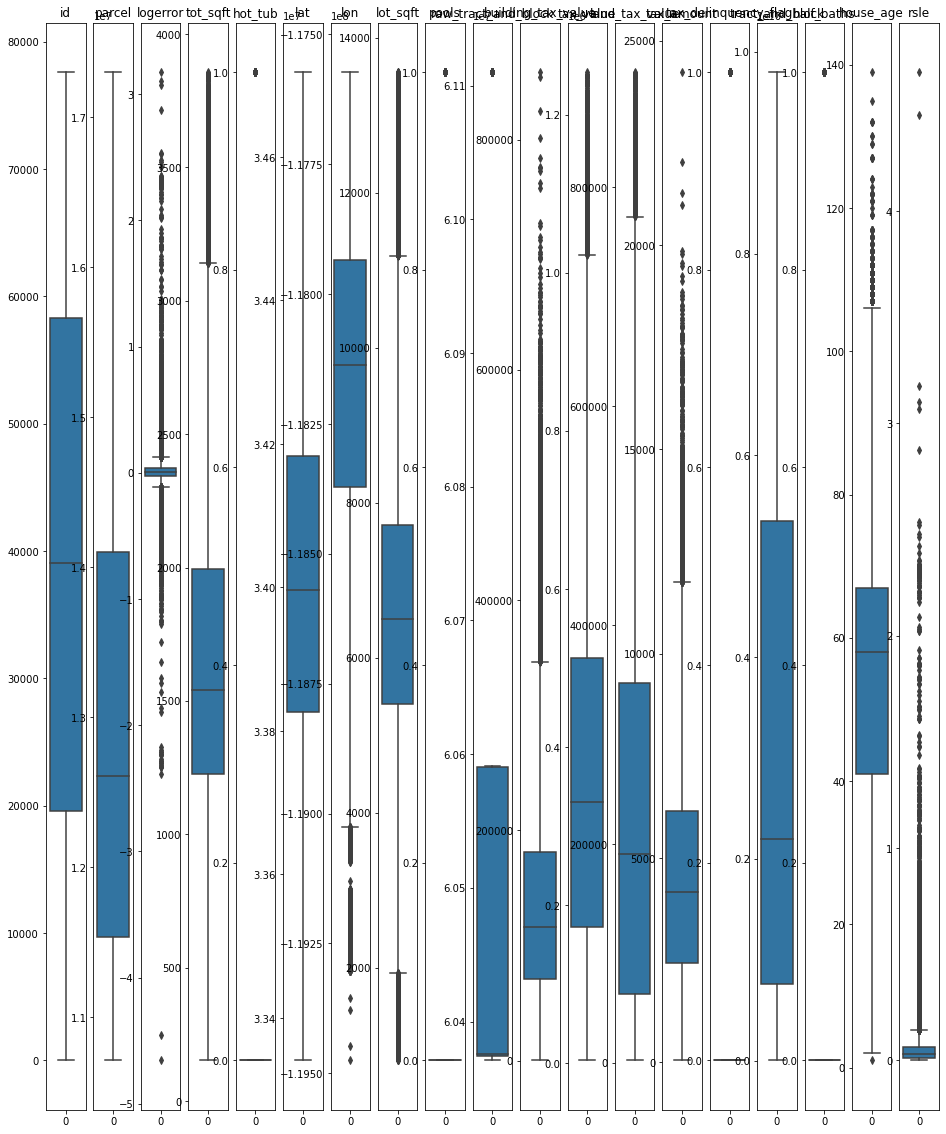

In [10]:
boxplots(df[num_vars])

In [14]:
train, validate, test = split_data_continuous(df, with_baseline=True, target='rsle')

Prepared df: (41067, 25)

Train: (24639, 25)
Validate: (8214, 25)
Test: (8214, 25)
The mean_preds had the lowest RMSE: 447296 with an in/out of: 1.018


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24639 non-null  int64  
 1   parcel                24639 non-null  int64  
 2   logerror              24639 non-null  float64
 3   bathrooms             24639 non-null  object 
 4   bedrooms              24639 non-null  object 
 5   tot_sqft              24639 non-null  float64
 6   fips                  24639 non-null  object 
 7   hot_tub               24639 non-null  float64
 8   lat                   24639 non-null  float64
 9   lon                   24639 non-null  float64
 10  lot_sqft              24639 non-null  float64
 11  pools                 24639 non-null  int64  
 12  county_landuse        24639 non-null  object 
 13  raw_tract_and_block   24639 non-null  float64
 14  city_id               24639 non-null  object 
 15  zip_code       

In [16]:
city=train
city['sle']= city.logerror**2

In [17]:
# validate['sle']= validate.logerror**2

# test['sle']= test.logerror**2

# train['rsle']= train.sle**.5

# validate['rsle']= validate.sle**.5

# test['rsle']= test.sle**.5

In [18]:
city['le']= city.logerror

In [19]:
le_per_city = city[['le', 'sle', 'rsle', 'city_id']].groupby('city_id').agg(
['min', 'max', 'median', 'std', 'mean']).reset_index()

<!-- # le_per_city = train[['le', 'city_id']].groupby('city_id').agg(
# ['min', 'max', 'median', 'std', 'mean']).reset_index()

# sle_per_city = train[['sle', 'city_id']].groupby('city_id').agg(
# ['min', 'max', 'median', 'std', 'mean']).reset_index()

# rsle_per_city = train[['rsle', 'city_id']].groupby('city_id').agg(
# ['min', 'max', 'median', 'std', 'mean']).reset_index() -->

In [20]:
le_per_city.columns = ['_'.join(column) for column in le_per_city.columns.to_flat_index()]

In [21]:
le_per_city.columns

Index(['city_id_', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean'],
      dtype='object')

In [22]:
le_per_city.columns = ['city_id', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean']

<!-- # le_per_city.columns = ['city_id', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean']

# sle_per_city.columns = ['_'.join(column) for column in sle_per_city.columns.to_flat_index()]

# sle_per_city.columns

# sle_per_city.columns = ['city_id_', 'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean']

# rsle_per_city.columns = ['_'.join(column) for column in rsle_per_city.columns.to_flat_index()]

# rsle_per_city.columns

# rsle_per_city.columns = ['city_id', 'rsle_min', 'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean'] -->

In [23]:
le_per_city

city_id    le_min    le_max  le_median    le_std   le_mean       sle_min  \
0     10241 -0.143684  0.409479   0.011274  0.092781  0.036141  4.096753e-07   
1     10389 -0.289564  0.185907  -0.053653  0.129784 -0.054199  2.571994e-04   
2     10608 -2.300184  2.318126  -0.000125  0.311870  0.033417  1.570206e-08   
3     10723 -0.272320  0.432247  -0.003246  0.093069  0.007334  8.588302e-07   
4     10734 -0.062123  0.610729   0.009675  0.062706  0.015262  4.685839e-08   
..      ...       ...       ...        ...       ...       ...           ...   
161   56780 -0.087881  0.095431   0.037789  0.058781  0.027102  8.477498e-08   
162    6021 -0.167958  0.960386  -0.003450  0.134920  0.012259  2.088024e-07   
163    6395 -0.067120  1.003781   0.011441  0.180587  0.039175  6.305236e-07   
164    8384 -2.283001  2.313247   0.004115  0.263772  0.012904  1.276021e-07   
165    9840 -0.071082  0.208092   0.008632  0.059754  0.017984  5.999994e-06   

      sle_max  sle_median   sle_std  sle_mean  rsle_min  rsle_max  \
0    0.167673    0.000912  0.027802  0.009816  0.000640  0.409479   
1    0.083847    0.008679  0.025054  0.018578  0.016037  0.289564   
2    5.373706    0.000814  0.625122  0.097935  0.000125  2.318126   
3    0.186838    0.001016  0.022891  0.008646  0.000927  0.432247   
4    0.372990    0.000252  0.035353  0.004129  0.000216  0.610729   
..        ...         ...       ...       ...       ...       ...   
161  0.009107    0.001660  0.003547  0.003696  0.000291  0.095431   
162  0.922341    0.001365  0.102493  0.018132  0.000457  0.960386   
163  1.007576    0.000695  0.175077  0.033158  0.000794  1.003781   
164  5.351113    0.000461  0.569973  0.069335  0.000357  2.313247   
165  0.043302    0.000451  0.008440  0.003767  0.002449  0.208092   

     rsle_median  rsle_std  rsle_mean  
0       0.030195  0.078793   0.060651  
1       0.093018  0.082645   0.110616  
2       0.028525  0.299955   0.091506  
3       0.031866  0.071279   0.060050  
4       0.015872  0.058644   0.026858  
..           ...       ...        ...  
161     0.040738  0.033492   0.052295  
162     0.036945  0.116726   0.068359  
163     0.026367  0.172688   0.065120  
164     0.021475  0.254250   0.071207  
165     0.021194  0.045797   0.041762  

[166 rows x 16 columns]

In [24]:
# fips_per_zip = df[['zip_code', 'fips']].groupby('zip_code').agg('count')
city['city_id_count'] = 1
city_county = city[['city_id', 'fips', 'city_id_count']]\
.groupby('city_id').agg({'fips':'first', 'city_id_count': 'count'})
city_county = city_county.reset_index()

city_county.columns = ['city_id_check', 'county', 'house_count']
city_county

city_id_check              county  house_count
0           10241  Los Angeles County           87
1           10389  Los Angeles County           14
2           10608       Orange County          219
3           10723  Los Angeles County          124
4           10734  Los Angeles County          111
..            ...                 ...          ...
161         56780  Los Angeles County            7
162          6021  Los Angeles County           82
163          6395  Los Angeles County           33
164          8384       Orange County          171
165          9840  Los Angeles County           28

[166 rows x 3 columns]

In [25]:
le_per_city = pd.concat([le_per_city, city_county], axis=1)
le_per_city.drop(columns='city_id_check', inplace=True)
le_per_city

city_id    le_min    le_max  le_median    le_std   le_mean       sle_min  \
0     10241 -0.143684  0.409479   0.011274  0.092781  0.036141  4.096753e-07   
1     10389 -0.289564  0.185907  -0.053653  0.129784 -0.054199  2.571994e-04   
2     10608 -2.300184  2.318126  -0.000125  0.311870  0.033417  1.570206e-08   
3     10723 -0.272320  0.432247  -0.003246  0.093069  0.007334  8.588302e-07   
4     10734 -0.062123  0.610729   0.009675  0.062706  0.015262  4.685839e-08   
..      ...       ...       ...        ...       ...       ...           ...   
161   56780 -0.087881  0.095431   0.037789  0.058781  0.027102  8.477498e-08   
162    6021 -0.167958  0.960386  -0.003450  0.134920  0.012259  2.088024e-07   
163    6395 -0.067120  1.003781   0.011441  0.180587  0.039175  6.305236e-07   
164    8384 -2.283001  2.313247   0.004115  0.263772  0.012904  1.276021e-07   
165    9840 -0.071082  0.208092   0.008632  0.059754  0.017984  5.999994e-06   

      sle_max  sle_median   sle_std  sle_mean  rsle_min  rsle_max  \
0    0.167673    0.000912  0.027802  0.009816  0.000640  0.409479   
1    0.083847    0.008679  0.025054  0.018578  0.016037  0.289564   
2    5.373706    0.000814  0.625122  0.097935  0.000125  2.318126   
3    0.186838    0.001016  0.022891  0.008646  0.000927  0.432247   
4    0.372990    0.000252  0.035353  0.004129  0.000216  0.610729   
..        ...         ...       ...       ...       ...       ...   
161  0.009107    0.001660  0.003547  0.003696  0.000291  0.095431   
162  0.922341    0.001365  0.102493  0.018132  0.000457  0.960386   
163  1.007576    0.000695  0.175077  0.033158  0.000794  1.003781   
164  5.351113    0.000461  0.569973  0.069335  0.000357  2.313247   
165  0.043302    0.000451  0.008440  0.003767  0.002449  0.208092   

     rsle_median  rsle_std  rsle_mean              county  house_count  
0       0.030195  0.078793   0.060651  Los Angeles County           87  
1       0.093018  0.082645   0.110616  Los Angeles County           14  
2       0.028525  0.299955   0.091506       Orange County          219  
3       0.031866  0.071279   0.060050  Los Angeles County          124  
4       0.015872  0.058644   0.026858  Los Angeles County          111  
..           ...       ...        ...                 ...          ...  
161     0.040738  0.033492   0.052295  Los Angeles County            7  
162     0.036945  0.116726   0.068359  Los Angeles County           82  
163     0.026367  0.172688   0.065120  Los Angeles County           33  
164     0.021475  0.254250   0.071207       Orange County          171  
165     0.021194  0.045797   0.041762  Los Angeles County           28  

[166 rows x 18 columns]

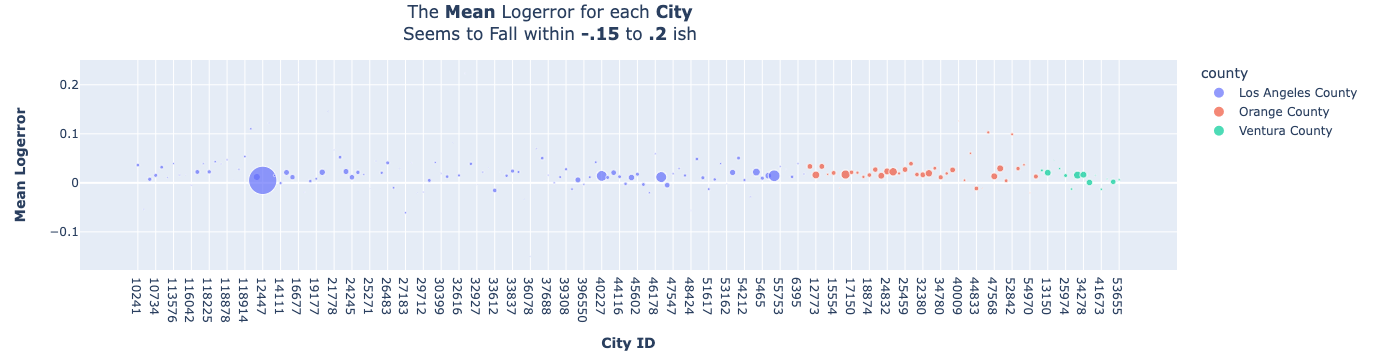

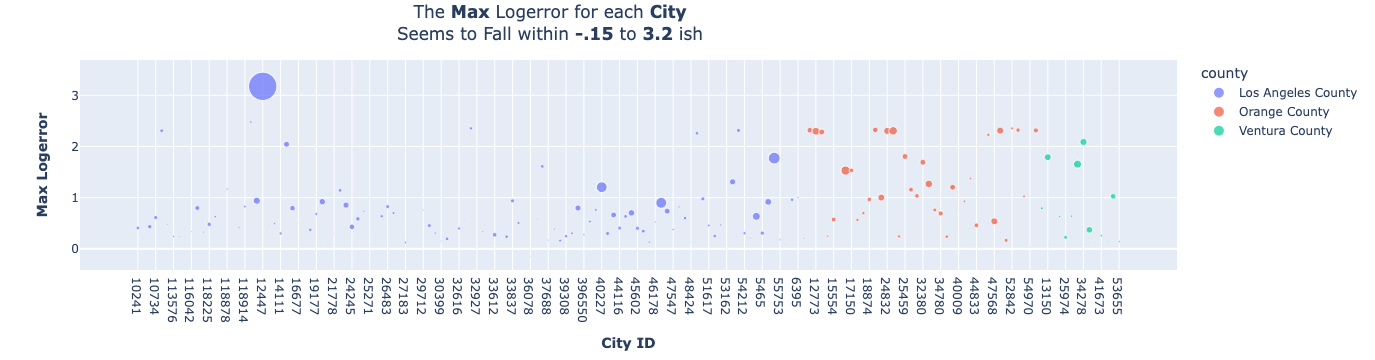

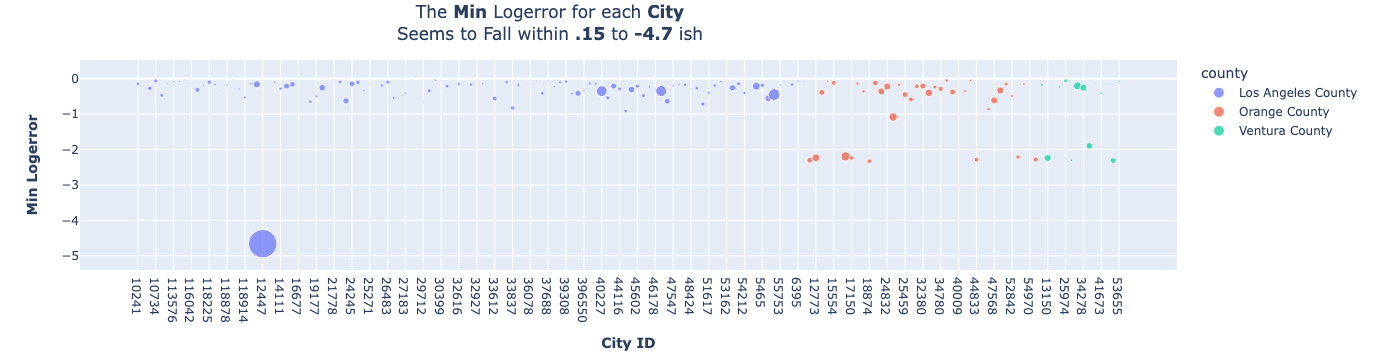

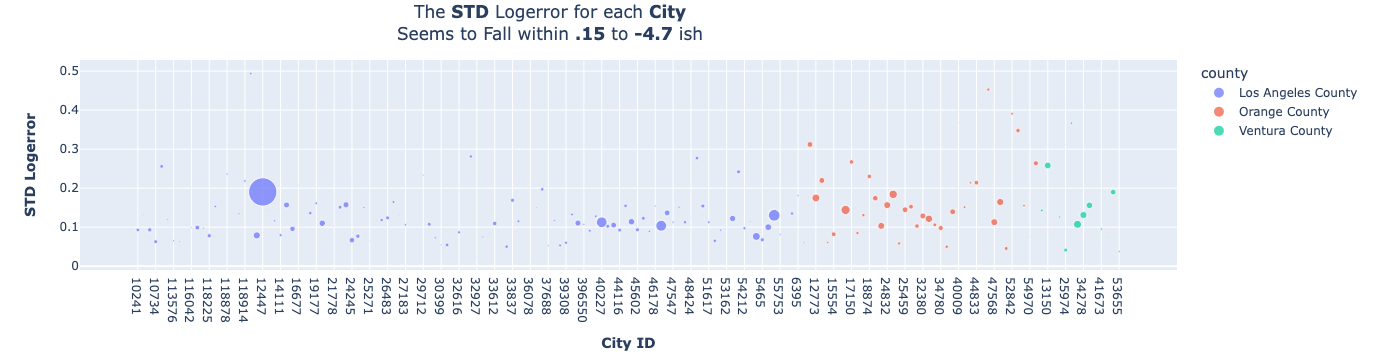

In [26]:
fig_mean_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= 'city_id',
           y= 'le_mean',
           color= 'county',
           size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_mean': '<b>Mean Logerror</b>'}
          )

fig_mean_logerror_by_city.update_layout(title= {'text': 'The <b>Mean</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>-.15</b> to <b>.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_max': '<b>Max Logerror</b>'}
          )
fig_max_logerror_by_city.update_layout(title= {'text': 'The <b>Max</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>-.15</b> to <b>3.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_min,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_min': '<b>Min Logerror</b>'}
          )
fig_min_logerror_by_city.update_layout(title= {'text': 'The <b>Min</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>.15</b> to <b>-4.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_logerror_by_city = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.le_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': '<b>City ID</b>'
                   ,'le_std': '<b>STD Logerror</b>'}
          )
fig_std_logerror_by_city.update_layout(title= {'text': 'The <b>STD</b> Logerror for each <b>City</b><br>\
Seems to Fall within <b>.15</b> to <b>-4.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_logerror_by_city.show()
fig_max_logerror_by_city.show()
fig_min_logerror_by_city.show()
fig_std_logerror_by_city.show()

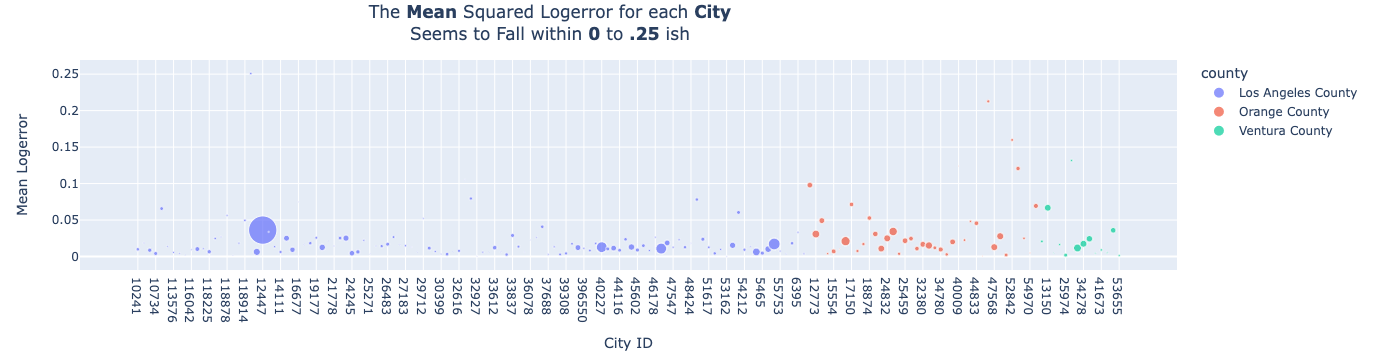

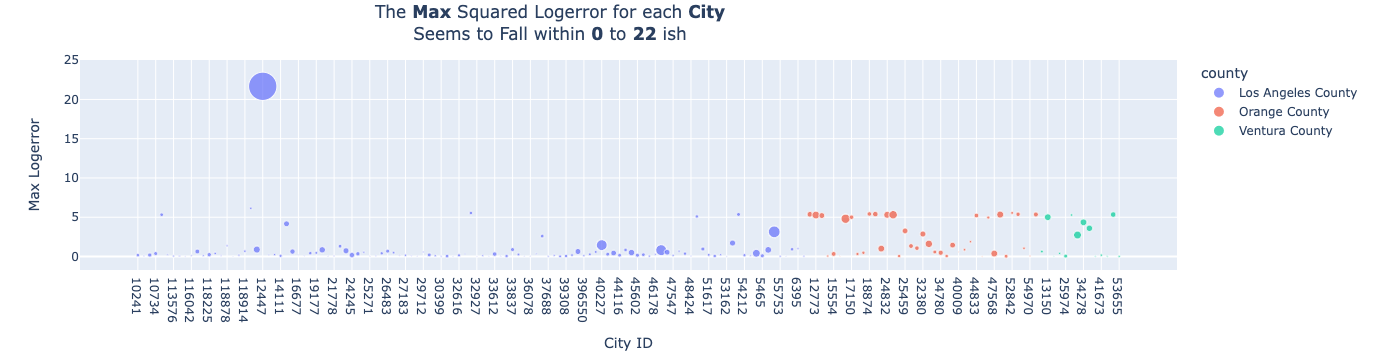

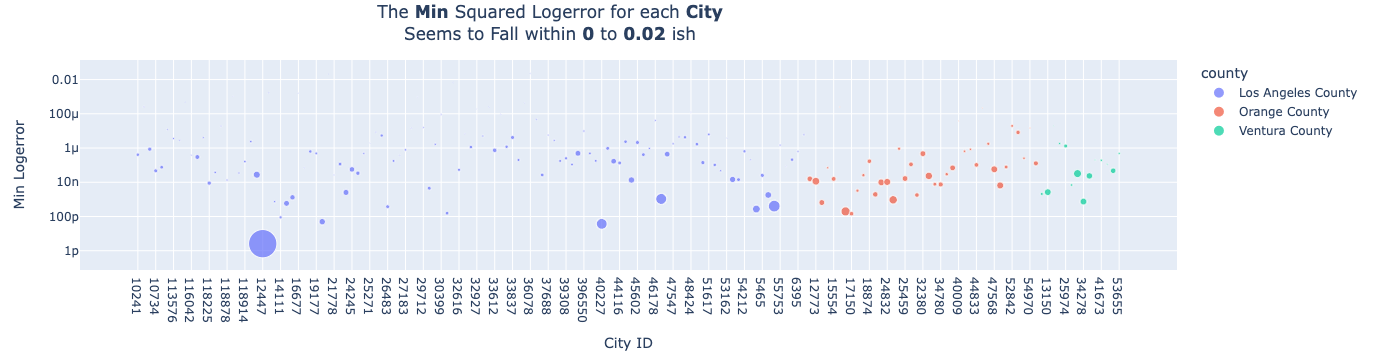

In [27]:
fig1 = px.scatter(data_frame= le_per_city,
           x= 'city_id',
           y= 'sle_mean',
           color= 'county',
                  size= 'house_count',
           labels= {'city_id': 'City ID'
                   ,'sle_mean': 'Mean Logerror'}
          )

fig1.update_layout(title= {'text': 'The <b>Mean</b> Squared Logerror for each <b>City</b><br>\
Seems to Fall within <b>0</b> to <b>.25</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig2 = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.sle_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': 'City ID'
                   ,'sle_max': 'Max Logerror'}
          )
fig2.update_layout(title= {'text': 'The <b>Max</b> Squared Logerror for each <b>City</b><br>\
Seems to Fall within <b>0</b> to <b>22</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig3 = px.scatter(data_frame= le_per_city,
           x= le_per_city.city_id,
           y= le_per_city.sle_min,
                  log_y= True,
                  color= 'county',
                  size= 'house_count',
           labels= {'city_id': 'City ID'
                   ,'sle_min': 'Min Logerror'}
          )
fig3.update_layout(title= {'text': 'The <b>Min</b> Squared Logerror for each <b>City</b><br>\
Seems to Fall within <b>0</b> to <b>0.02</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig1.show()
fig2.show()
fig3.show()

In [28]:
#  Let's look at zip_code in the same way

In [29]:
le_per_zip = city[['le', 'sle', 'rsle', 'zip_code']].groupby('zip_code').agg(
['min', 'max', 'median', 'std', 'mean']).reset_index()

In [30]:
le_per_zip.columns = ['_'.join(column) for column in le_per_zip.columns.to_flat_index()]

In [31]:
le_per_zip.columns

Index(['zip_code_', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean'],
      dtype='object')

In [32]:
le_per_zip.columns = ['zip_code', 'le_min', 'le_max', 'le_median', 'le_std', 'le_mean',
       'sle_min', 'sle_max', 'sle_median', 'sle_std', 'sle_mean', 'rsle_min',
       'rsle_max', 'rsle_median', 'rsle_std', 'rsle_mean']

In [33]:
le_per_zip

zip_code    le_min    le_max  le_median    le_std   le_mean       sle_min  \
0      95982 -0.697602  0.304941  -0.004536  0.179464 -0.019853  1.504240e-05   
1      95983 -0.311683  0.603451  -0.002140  0.179834  0.033488  1.094522e-07   
2      95984 -1.031920  0.790644  -0.008902  0.291863 -0.042335  4.576270e-06   
3      95985 -1.738639  0.368278  -0.006486  0.288611 -0.037999  2.575038e-12   
4      95986 -0.191605  0.226761  -0.035620  0.131984  0.006648  5.107479e-05   
..       ...       ...       ...        ...       ...       ...           ...   
365    97323 -0.130279  0.035976   0.031008  0.094585 -0.021098  9.615008e-04   
366    97324 -0.150279  0.145576  -0.002351  0.209201 -0.002351  2.119229e-02   
367    97328 -0.351406  1.204645  -0.000524  0.142017  0.025562  2.420109e-08   
368    97329 -0.182647  0.656530   0.002755  0.084406  0.013635  3.702503e-11   
369    97330 -0.326200  0.670194  -0.006258  0.089689 -0.003227  4.090486e-08   

      sle_max  sle_median   sle_std  sle_mean  rsle_min  rsle_max  \
0    0.486649    0.003941  0.084974  0.031852  0.003878  0.697602   
1    0.364153    0.003669  0.071486  0.033052  0.000331  0.603451   
2    1.064859    0.002604  0.209284  0.085924  0.002139  1.031920   
3    3.022866    0.003653  0.454678  0.082847  0.000002  1.738639   
4    0.051420    0.005820  0.018278  0.015880  0.007147  0.226761   
..        ...         ...       ...       ...       ...       ...   
365  0.016973    0.001294  0.009149  0.006409  0.031008  0.130279   
366  0.022584    0.021888  0.000984  0.021888  0.145576  0.150279   
367  1.451169    0.000887  0.109420  0.020756  0.000156  1.204645   
368  0.431031    0.000434  0.040117  0.007284  0.000006  0.656530   
369  0.449160    0.000544  0.040583  0.008013  0.000202  0.670194   

     rsle_median  rsle_std  rsle_mean  
0       0.062773  0.141697   0.110640  
1       0.060570  0.139457   0.117688  
2       0.051026  0.245392   0.162637  
3       0.060440  0.264546   0.120222  
4       0.076288  0.077340   0.102189  
..           ...       ...        ...  
365     0.035976  0.055935   0.065754  
366     0.147927  0.003325   0.147927  
367     0.029775  0.127535   0.067411  
368     0.020835  0.074631   0.041651  
369     0.023316  0.077254   0.045561  

[370 rows x 16 columns]

In [34]:
# fips_per_zip = df[['zip_code', 'fips']].groupby('zip_code').agg('count')
city['zip_code_count'] = 1
city_county = city[['zip_code', 'fips', 'zip_code_count']]\
.groupby('zip_code').agg({'fips':'first', 'zip_code_count': 'count'})
city_county = city_county.reset_index()

city_county.columns = ['zip_code_check', 'county', 'house_count']
city_county

zip_code_check              county  house_count
0            95982  Los Angeles County           43
1            95983  Los Angeles County           79
2            95984  Los Angeles County           81
3            95985  Los Angeles County           44
4            95986  Los Angeles County           11
..             ...                 ...          ...
365          97323  Los Angeles County            3
366          97324  Los Angeles County            2
367          97328  Los Angeles County          307
368          97329  Los Angeles County          268
369          97330  Los Angeles County          196

[370 rows x 3 columns]

In [35]:
le_per_zip = pd.concat([le_per_zip, city_county], axis=1)
le_per_zip.drop(columns='zip_code_check', inplace=True)
le_per_zip

zip_code    le_min    le_max  le_median    le_std   le_mean       sle_min  \
0      95982 -0.697602  0.304941  -0.004536  0.179464 -0.019853  1.504240e-05   
1      95983 -0.311683  0.603451  -0.002140  0.179834  0.033488  1.094522e-07   
2      95984 -1.031920  0.790644  -0.008902  0.291863 -0.042335  4.576270e-06   
3      95985 -1.738639  0.368278  -0.006486  0.288611 -0.037999  2.575038e-12   
4      95986 -0.191605  0.226761  -0.035620  0.131984  0.006648  5.107479e-05   
..       ...       ...       ...        ...       ...       ...           ...   
365    97323 -0.130279  0.035976   0.031008  0.094585 -0.021098  9.615008e-04   
366    97324 -0.150279  0.145576  -0.002351  0.209201 -0.002351  2.119229e-02   
367    97328 -0.351406  1.204645  -0.000524  0.142017  0.025562  2.420109e-08   
368    97329 -0.182647  0.656530   0.002755  0.084406  0.013635  3.702503e-11   
369    97330 -0.326200  0.670194  -0.006258  0.089689 -0.003227  4.090486e-08   

      sle_max  sle_median   sle_std  sle_mean  rsle_min  rsle_max  \
0    0.486649    0.003941  0.084974  0.031852  0.003878  0.697602   
1    0.364153    0.003669  0.071486  0.033052  0.000331  0.603451   
2    1.064859    0.002604  0.209284  0.085924  0.002139  1.031920   
3    3.022866    0.003653  0.454678  0.082847  0.000002  1.738639   
4    0.051420    0.005820  0.018278  0.015880  0.007147  0.226761   
..        ...         ...       ...       ...       ...       ...   
365  0.016973    0.001294  0.009149  0.006409  0.031008  0.130279   
366  0.022584    0.021888  0.000984  0.021888  0.145576  0.150279   
367  1.451169    0.000887  0.109420  0.020756  0.000156  1.204645   
368  0.431031    0.000434  0.040117  0.007284  0.000006  0.656530   
369  0.449160    0.000544  0.040583  0.008013  0.000202  0.670194   

     rsle_median  rsle_std  rsle_mean              county  house_count  
0       0.062773  0.141697   0.110640  Los Angeles County           43  
1       0.060570  0.139457   0.117688  Los Angeles County           79  
2       0.051026  0.245392   0.162637  Los Angeles County           81  
3       0.060440  0.264546   0.120222  Los Angeles County           44  
4       0.076288  0.077340   0.102189  Los Angeles County           11  
..           ...       ...        ...                 ...          ...  
365     0.035976  0.055935   0.065754  Los Angeles County            3  
366     0.147927  0.003325   0.147927  Los Angeles County            2  
367     0.029775  0.127535   0.067411  Los Angeles County          307  
368     0.020835  0.074631   0.041651  Los Angeles County          268  
369     0.023316  0.077254   0.045561  Los Angeles County          196  

[370 rows x 18 columns]

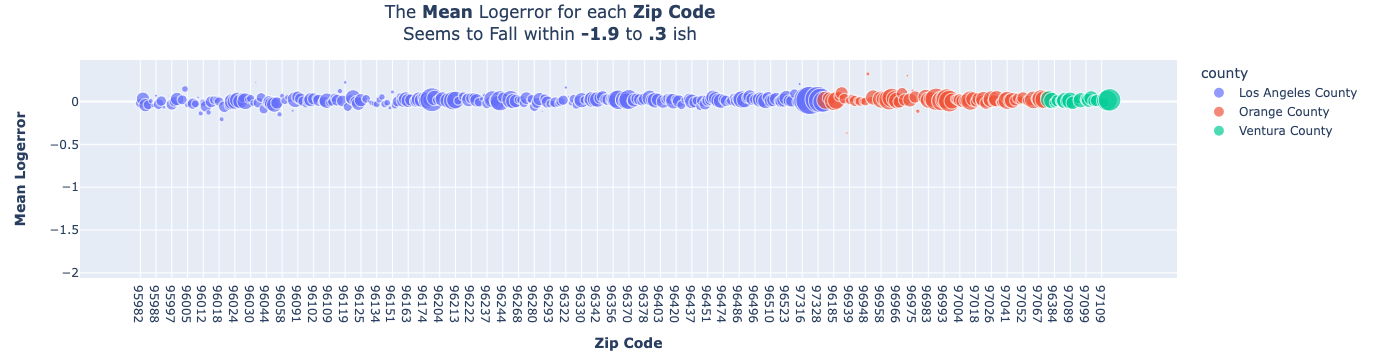

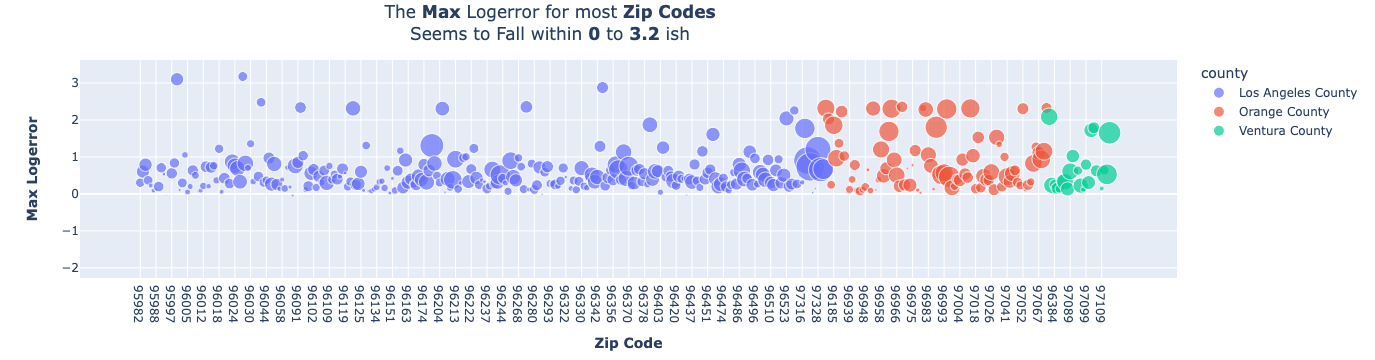

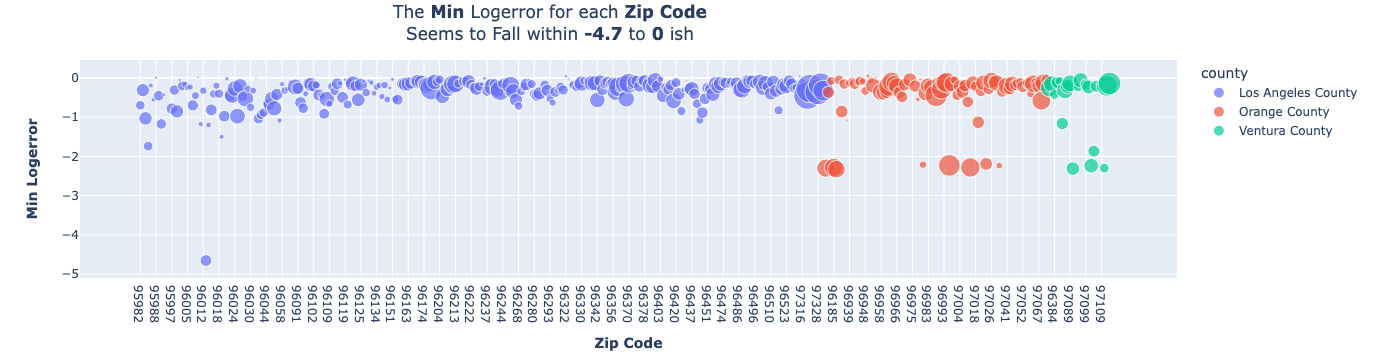

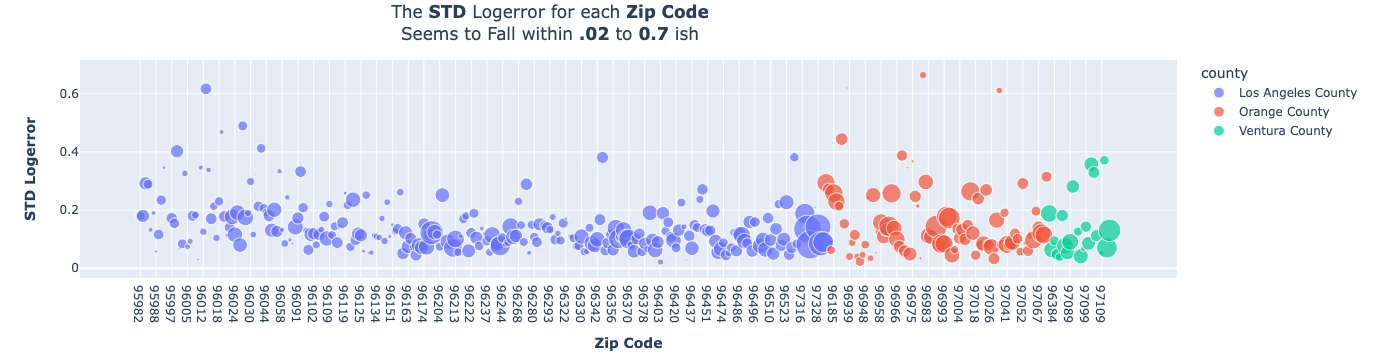

In [36]:
fig_mean_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= 'zip_code',
           y= 'le_mean',
           color= 'county',
           size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_mean': '<b>Mean Logerror</b>'}
          )

fig_mean_logerror_by_zip.update_layout(title= {'text': 'The <b>Mean</b> Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-1.9</b> to <b>.3</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_max': '<b>Max Logerror</b>'}
          )
fig_max_logerror_by_zip.update_layout(title= {'text': 'The <b>Max</b> Logerror for most <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>3.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_min,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_min': '<b>Min Logerror</b>'}
          )
fig_min_logerror_by_zip.update_layout(title= {'text': 'The <b>Min</b> Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-4.7</b> to <b>0</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_logerror_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.le_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'le_std': '<b>STD Logerror</b>'}
          )
fig_std_logerror_by_zip.update_layout(title= {'text': 'The <b>STD</b> Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>.02</b> to <b>0.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_logerror_by_zip.show()
fig_max_logerror_by_zip.show()
fig_min_logerror_by_zip.show()
fig_std_logerror_by_zip.show()

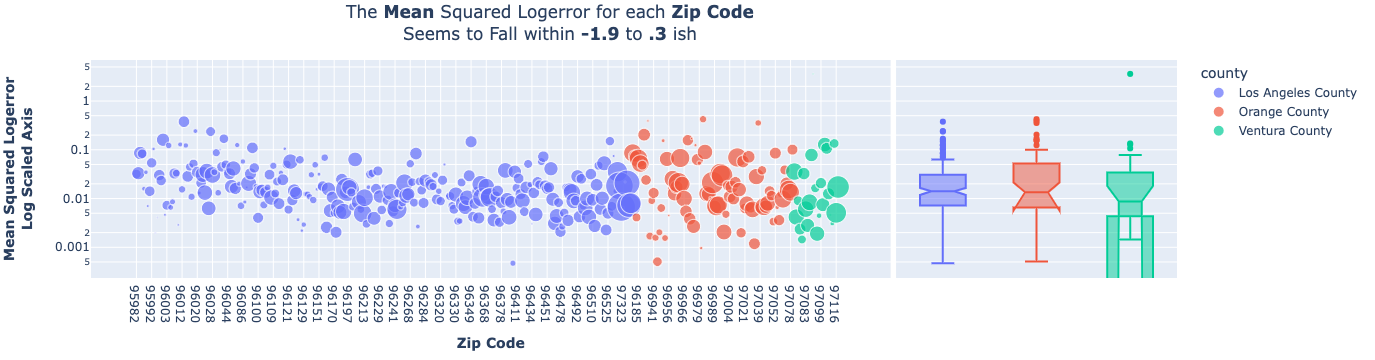

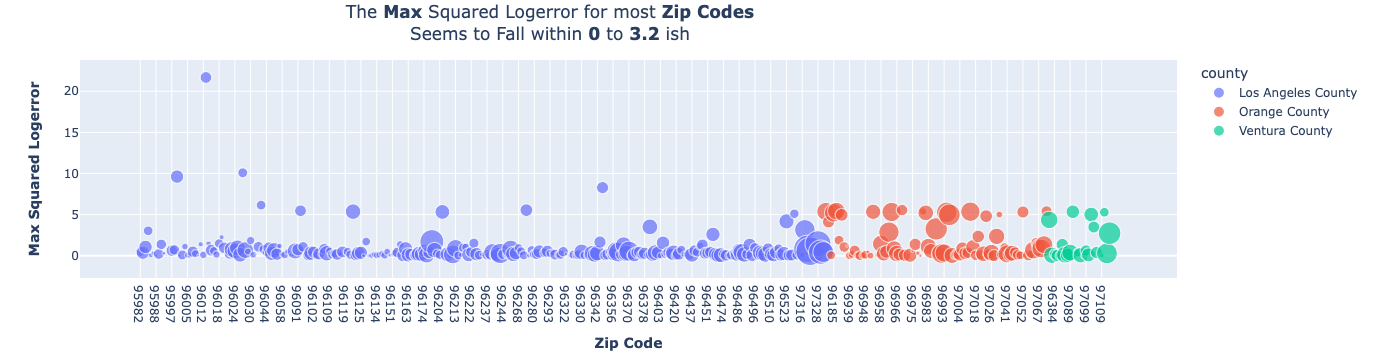

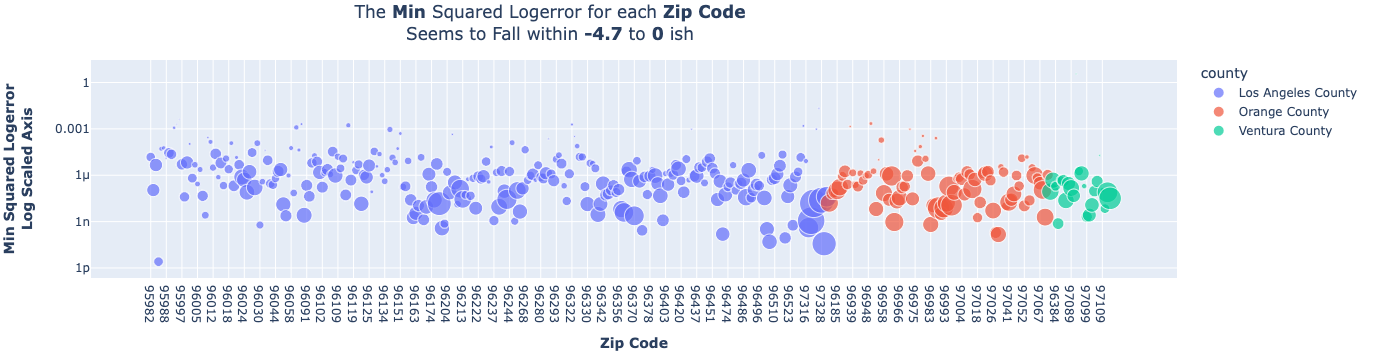

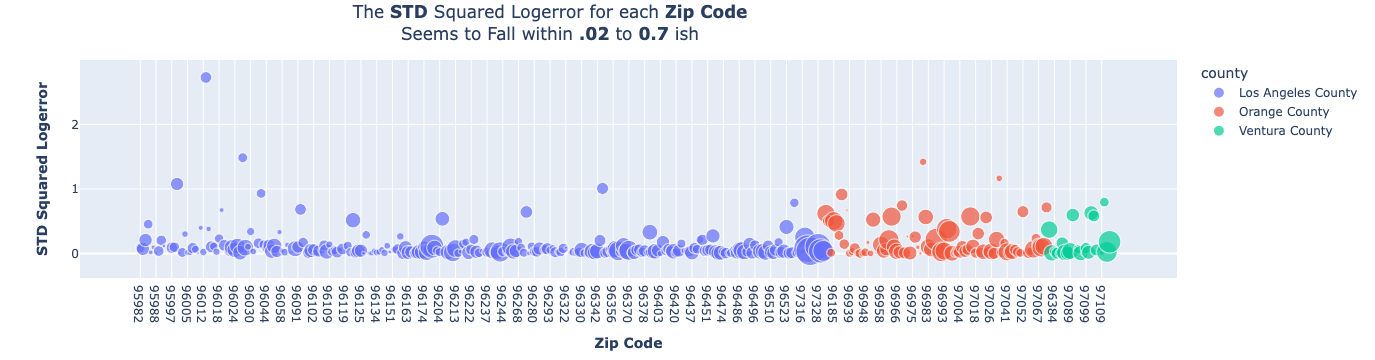

In [37]:
fig_mean_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= 'zip_code',
           y= 'sle_mean',
           color= 'county',
           size= 'house_count',
                                 marginal_y= 'box',
                                 log_y= True,
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_mean': '<b>Mean Squared Logerror<br>Log Scaled Axis</b>'}
          )

fig_mean_sle_by_zip.update_layout(title= {'text': 'The <b>Mean</b> Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-1.9</b> to <b>.3</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.sle_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_max': '<b>Max Squared Logerror</b>'}
          )
fig_max_sle_by_zip.update_layout(title= {'text': 'The <b>Max</b> Squared Logerror for most <b>Zip Codes</b><br>\
Seems to Fall within <b>0</b> to <b>3.2</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.sle_min,
                  color= 'county',
                  size= 'house_count',
                                log_y= True,
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_min': '<b>Min Squared Logerror<br>Log Scaled Axis</b>'}
          )
fig_min_sle_by_zip.update_layout(title= {'text': 'The <b>Min</b> Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>-4.7</b> to <b>0</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_sle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.sle_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'sle_std': '<b>STD Squared Logerror</b>'}
          )
fig_std_sle_by_zip.update_layout(title= {'text': 'The <b>STD</b> Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>.02</b> to <b>0.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_sle_by_zip.show()
fig_max_sle_by_zip.show()
fig_min_sle_by_zip.show()
fig_std_sle_by_zip.show()

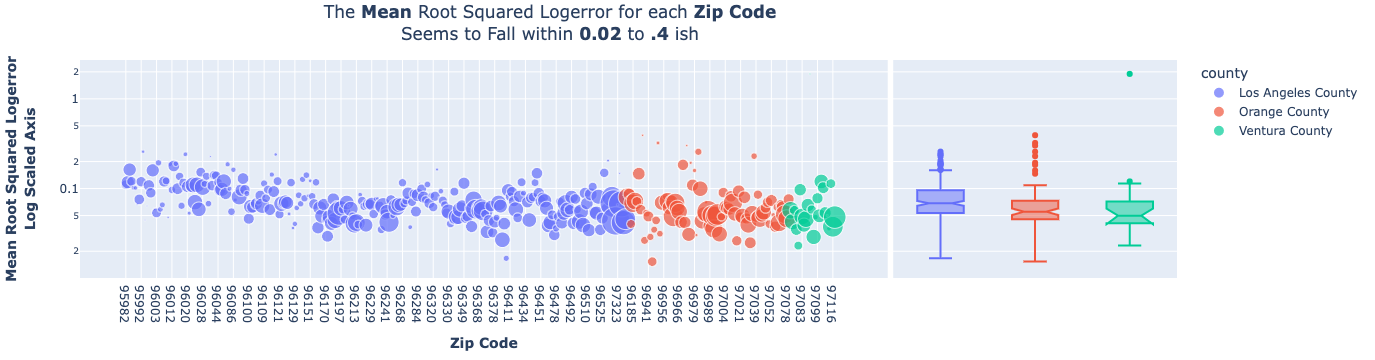

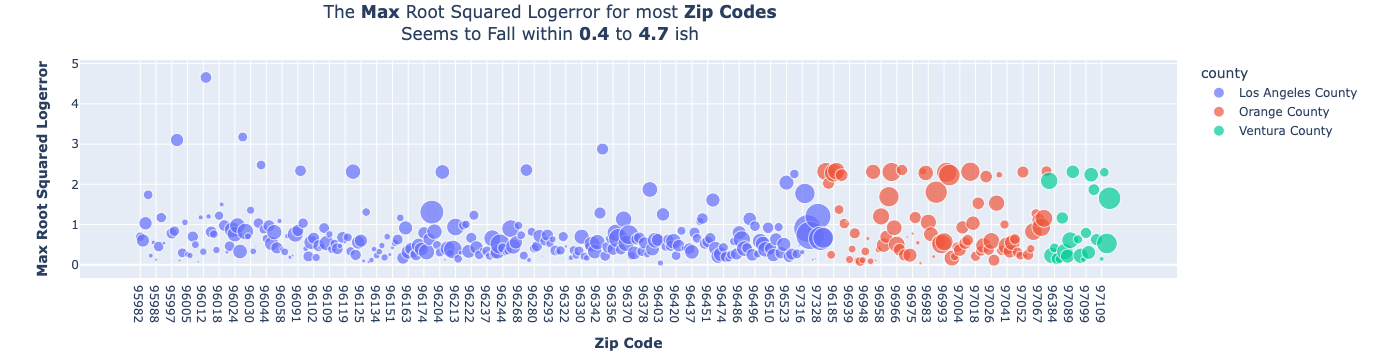

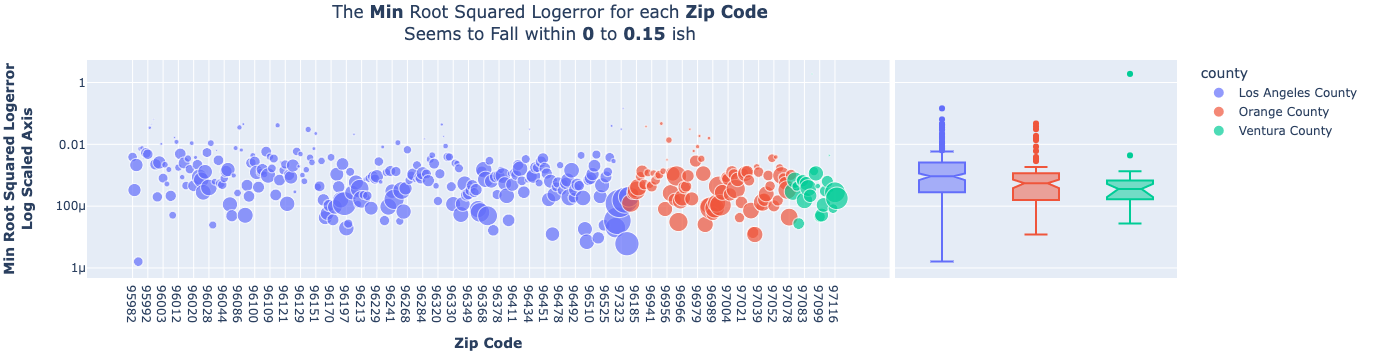

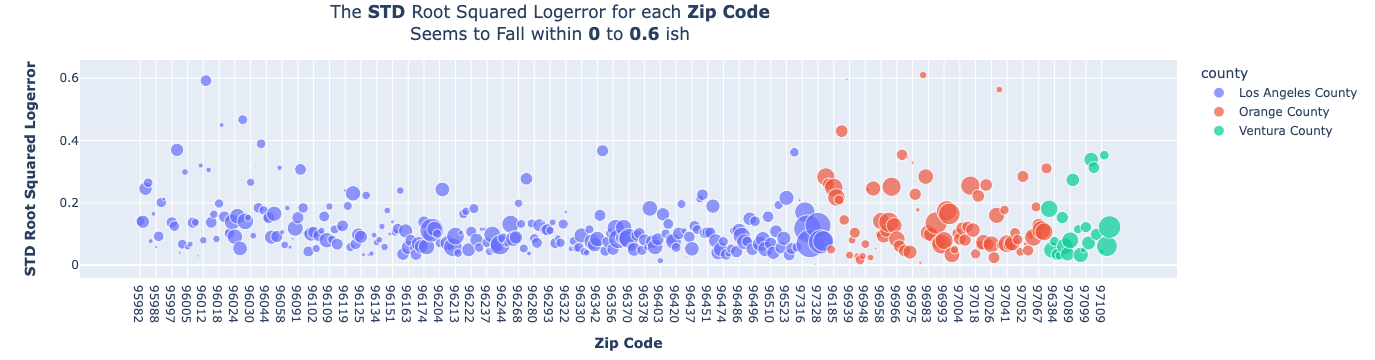

In [38]:
fig_mean_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= 'zip_code',
           y= 'rsle_mean',
           color= 'county',
           size= 'house_count',
                                  log_y=True,
                                 marginal_y='box',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_mean': '<b>Mean Root Squared Logerror<br>Log Scaled Axis</b>'}
          )

fig_mean_rsle_by_zip.update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>0.02</b> to <b>.4</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_max_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.rsle_max,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_max': '<b>Max Root Squared Logerror</b>'}
          )
fig_max_rsle_by_zip.update_layout(title= {'text': 'The <b>Max</b> Root Squared Logerror for most <b>Zip Codes</b><br>\
Seems to Fall within <b>0.4</b> to <b>4.7</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})


fig_min_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.rsle_min,
                  color= 'county',
                  size= 'house_count',
                                 log_y=True,
                                 marginal_y='box',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_min': '<b>Min Root Squared Logerror<br>Log Scaled Axis</b>'}
          )
fig_min_rsle_by_zip.update_layout(title= {'text': 'The <b>Min</b> Root Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>0</b> to <b>0.15</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_std_rsle_by_zip = px.scatter(data_frame= le_per_zip,
           x= le_per_zip.zip_code,
           y= le_per_zip.rsle_std,
                  color= 'county',
                  size= 'house_count',
           labels= {'zip_code': '<b>Zip Code</b>'
                   ,'rsle_std': '<b>STD Root Squared Logerror</b>'}
          )
fig_std_rsle_by_zip.update_layout(title= {'text': 'The <b>STD</b> Root Squared Logerror for each <b>Zip Code</b><br>\
Seems to Fall within <b>0</b> to <b>0.6</b> ish',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})

fig_mean_rsle_by_zip.show()
fig_max_rsle_by_zip.show()
fig_min_rsle_by_zip.show()
fig_std_rsle_by_zip.show()

In [39]:
from modeling import model_sets

In [40]:
# train, validate, test = get_baselines(train, validate, test, y='rsle')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24639 non-null  int64  
 1   parcel                24639 non-null  int64  
 2   logerror              24639 non-null  float64
 3   bathrooms             24639 non-null  object 
 4   bedrooms              24639 non-null  object 
 5   tot_sqft              24639 non-null  float64
 6   fips                  24639 non-null  object 
 7   hot_tub               24639 non-null  float64
 8   lat                   24639 non-null  float64
 9   lon                   24639 non-null  float64
 10  lot_sqft              24639 non-null  float64
 11  pools                 24639 non-null  int64  
 12  county_landuse        24639 non-null  object 
 13  raw_tract_and_block   24639 non-null  float64
 14  city_id               24639 non-null  object 
 15  zip_code       

In [47]:
train.columns.to_list()

['id',
 'parcel',
 'logerror',
 'bathrooms',
 'bedrooms',
 'tot_sqft',
 'fips',
 'hot_tub',
 'lat',
 'lon',
 'lot_sqft',
 'pools',
 'county_landuse',
 'raw_tract_and_block',
 'city_id',
 'zip_code',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'tract_and_block',
 'half_baths',
 'house_age',
 'rsle',
 'baseline']

In [43]:
train[['bathrooms',
 'bedrooms',
 'tot_sqft',
 'fips',
 'hot_tub',
 'lot_sqft',
 'pools',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'half_baths',
 'house_age',
]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             24639 non-null  object 
 1   bedrooms              24639 non-null  object 
 2   tot_sqft              24639 non-null  float64
 3   fips                  24639 non-null  object 
 4   hot_tub               24639 non-null  float64
 5   lot_sqft              24639 non-null  float64
 6   pools                 24639 non-null  int64  
 7   building_tax_value    24639 non-null  float64
 8   tax_value             24639 non-null  float64
 9   land_tax_value        24639 non-null  float64
 10  tax_amount            24639 non-null  float64
 11  tax_delinquency_flag  24639 non-null  int64  
 12  half_baths            24639 non-null  int64  
 13  house_age             24639 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 3.3+ MB


In [52]:
df1 =df[['bathrooms',
 'bedrooms',
 'tot_sqft',
 'fips',
 'hot_tub',
 'lot_sqft',
 'pools',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'half_baths',
 'house_age',
         'rsle'
]]

In [53]:
df1.hot_tub = df1.hot_tub.astype('int')

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             41067 non-null  object 
 1   bedrooms              41067 non-null  object 
 2   tot_sqft              41067 non-null  float64
 3   fips                  41067 non-null  object 
 4   hot_tub               41067 non-null  int64  
 5   lot_sqft              41067 non-null  float64
 6   pools                 41067 non-null  int64  
 7   building_tax_value    41067 non-null  float64
 8   tax_value             41067 non-null  float64
 9   land_tax_value        41067 non-null  float64
 10  tax_amount            41067 non-null  float64
 11  tax_delinquency_flag  41067 non-null  int64  
 12  half_baths            41067 non-null  int64  
 13  house_age             41067 non-null  int64  
 14  rsle                  41067 non-null  float64
dtypes: float64(7), int6

In [55]:
df1 = pd.get_dummies(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tot_sqft                 41067 non-null  float64
 1   hot_tub                  41067 non-null  int64  
 2   lot_sqft                 41067 non-null  float64
 3   pools                    41067 non-null  int64  
 4   building_tax_value       41067 non-null  float64
 5   tax_value                41067 non-null  float64
 6   land_tax_value           41067 non-null  float64
 7   tax_amount               41067 non-null  float64
 8   tax_delinquency_flag     41067 non-null  int64  
 9   half_baths               41067 non-null  int64  
 10  house_age                41067 non-null  int64  
 11  rsle                     41067 non-null  float64
 12  bathrooms__1_            41067 non-null  uint8  
 13  bathrooms__2_            41067 non-null  uint8  
 14  bathrooms__3_         

In [56]:
df1 = df1.drop(columns= ['bathrooms__5_', 'bedrooms__5_'])

In [57]:
df1.columns

Index(['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'fips_Los Angeles County', 'fips_Orange County',
       'fips_Ventura County'],
      dtype='object')

In [58]:
df1.columns = ['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Los Angeles County', 'Orange County',
       'Ventura County']

In [74]:
train, validate, test = split_data_continuous(df1, with_baseline=True, target= 'rsle')

Prepared df: (41067, 22)

Train: (24639, 22)
Validate: (8214, 22)
Test: (8214, 22)
The mean_preds had the lowest RMSE: 447296 with an in/out of: 1.018


In [75]:
from modeling import scale_data

In [77]:
train, validate, test = scale_data(train, validate, test)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tot_sqft              24639 non-null  float64
 1   hot_tub               24639 non-null  float64
 2   lot_sqft              24639 non-null  float64
 3   pools                 24639 non-null  float64
 4   building_tax_value    24639 non-null  float64
 5   tax_value             24639 non-null  float64
 6   land_tax_value        24639 non-null  float64
 7   tax_amount            24639 non-null  float64
 8   tax_delinquency_flag  24639 non-null  float64
 9   half_baths            24639 non-null  float64
 10  house_age             24639 non-null  float64
 11  rsle                  24639 non-null  float64
 12  bathrooms__1_         24639 non-null  float64
 13  bathrooms__2_         24639 non-null  float64
 14  bathrooms__3_         24639 non-null  float64
 15  bathrooms__4_  

In [60]:
# X_train, y_train, x_validate, y_validate, X_test, y_test =\
# model_sets(train, validate, test, target= 'rsle', with_baseline=True)


X_cols = ['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag', 'half_baths', 'house_age', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'Los Angeles County', 'Orange County', 'Ventura County']

y_cols = ['rsle', 'baseline']




In [66]:
X_cols = ['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag', 'half_baths', 'house_age', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'Los Angeles County', 'Orange County', 'Ventura County']

y_cols = ['rsle', 'baseline']

In [63]:
# train = pd.concat([X_train, y_train], axis=1)

In [80]:
train.rsle.describe()

count    24639.000000
mean         0.014296
std          0.031527
min          0.000000
25%          0.002840
50%          0.006527
75%          0.013979
max          1.000000
Name: rsle, dtype: float64

In [68]:
from sklearn.cluster import KMeans


In [84]:
for i, j in enumerate(X_cols):
    for k in range(i+1, len(X_cols)):
        
        double_var = [j, X_cols[k], 'rsle']
        print(double_var)

['tot_sqft', 'hot_tub', 'rsle']
['tot_sqft', 'lot_sqft', 'rsle']
['tot_sqft', 'pools', 'rsle']
['tot_sqft', 'building_tax_value', 'rsle']
['tot_sqft', 'tax_value', 'rsle']
['tot_sqft', 'land_tax_value', 'rsle']
['tot_sqft', 'tax_amount', 'rsle']
['tot_sqft', 'tax_delinquency_flag', 'rsle']
['tot_sqft', 'half_baths', 'rsle']
['tot_sqft', 'house_age', 'rsle']
['tot_sqft', 'bathrooms__1_', 'rsle']
['tot_sqft', 'bathrooms__2_', 'rsle']
['tot_sqft', 'bathrooms__3_', 'rsle']
['tot_sqft', 'bathrooms__4_', 'rsle']
['tot_sqft', 'bedrooms__2_', 'rsle']
['tot_sqft', 'bedrooms__3_', 'rsle']
['tot_sqft', 'bedrooms__4_', 'rsle']
['tot_sqft', 'Los Angeles County', 'rsle']
['tot_sqft', 'Orange County', 'rsle']
['tot_sqft', 'Ventura County', 'rsle']
['hot_tub', 'lot_sqft', 'rsle']
['hot_tub', 'pools', 'rsle']
['hot_tub', 'building_tax_value', 'rsle']
['hot_tub', 'tax_value', 'rsle']
['hot_tub', 'land_tax_value', 'rsle']
['hot_tub', 'tax_amount', 'rsle']
['hot_tub', 'tax_delinquency_flag', 'rsle']
['hot

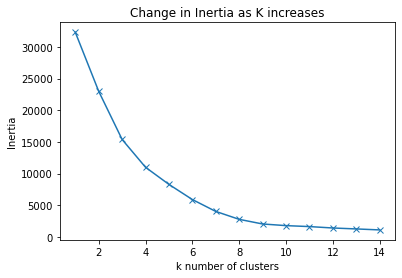

['tot_sqft', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'tax_value']


What is the Elbow?  7


The elbow is 7
KMeans(n_clusters=7)


In [101]:
double_var= ['tot_sqft', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'tax_value']

inertia_series = pd.Series(
            {k: KMeans(k).fit(train[double_var]).inertia_
            for k in range(1,15)})
        
inertia_series.plot(marker='x')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K increases')
plt.show()
print(double_var)

elbow = input('What is the Elbow? ')
elbow = int(elbow)
print(f'The elbow is {elbow}')

kmeans = KMeans(elbow).fit(train[double_var])
# kmeans = KMeans(8).fit(train[double_var])
print(kmeans)
train['clusters'] = kmeans.predict(train[double_var])

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tot_sqft                  24639 non-null  float64
 1   hot_tub                   24639 non-null  float64
 2   lot_sqft                  24639 non-null  float64
 3   pools                     24639 non-null  float64
 4   building_tax_value        24639 non-null  float64
 5   tax_value                 24639 non-null  float64
 6   land_tax_value            24639 non-null  float64
 7   tax_amount                24639 non-null  float64
 8   tax_delinquency_flag      24639 non-null  float64
 9   half_baths                24639 non-null  float64
 10  house_age                 24639 non-null  float64
 11  rsle                      24639 non-null  float64
 12  bathrooms__1_             24639 non-null  float64
 13  bathrooms__2_             24639 non-null  float64
 14  ba

In [103]:
train.columns

Index(['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Los Angeles County', 'Orange County', 'Ventura County',
       'baseline', 'cluster_tot_sqft_hot_tub', 'clusters_8', 'clusters'],
      dtype='object')

In [104]:
X_train = train[['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Los Angeles County', 'Orange County', 'Ventura County',
       'clusters']]

In [105]:
y_train

rsle  baseline
22185  0.057818         0
22137  0.053490         0
6006   0.041908         0
9389   0.024005         0
28432  0.052384         0
...         ...       ...
1698   0.006249         0
9269   0.013154         0
25263  0.012100         0
27654  0.071650         0
21732  0.007833         0

[24639 rows x 2 columns]

tot_sqft  hot_tub  lot_sqft  pools  building_tax_value  tax_value  \
22185  0.626998      0.0  0.501686    1.0            0.228034   0.430710   
22137  0.398165      0.0  0.508588    1.0            0.408822   0.734128   
6006   0.413558      0.0  0.192926    0.0            0.172673   0.171026   
9389   0.366785      0.0  0.339895    0.0            0.048603   0.057621   
28432  0.486086      0.0  0.576504    0.0            0.290766   0.902116   
...         ...      ...       ...    ...                 ...        ...   
1698   0.259029      0.0  0.460670    0.0            0.038147   0.043137   
9269   0.584665      0.0  0.410948    0.0            0.140017   0.124623   
25263  0.293073      0.0  0.288291    0.0            0.169449   0.261465   
27654  0.227946      0.0  0.466395    0.0            0.071257   0.192992   
21732  0.476021      0.0  0.891067    0.0            0.054420   0.092722   

       land_tax_value  tax_amount  tax_delinquency_flag  half_baths  ...  \
22185        0.381694    0.246786                   0.0         1.0  ...   
22137        0.630981    0.455684                   0.0         0.0  ...   
6006         0.074364    0.086689                   0.0         0.0  ...   
9389         0.034623    0.039659                   0.0         0.0  ...   
28432        0.975307    0.527335                   0.0         0.0  ...   
...               ...         ...                   ...         ...  ...   
1698         0.024450    0.035134                   0.0         0.0  ...   
9269         0.040975    0.187936                   0.0         0.0  ...   
25263        0.202679    0.136493                   0.0         1.0  ...   
27654        0.200700    0.130643                   0.0         0.0  ...   
21732        0.077740    0.133956                   0.0         0.0  ...   

       bedrooms__2_  bedrooms__3_  bedrooms__4_  Los Angeles County  \
22185           0.0           1.0           0.0                 0.0   
22137           0.0           1.0           0.0                 1.0   
6006            0.0           1.0           0.0                 0.0   
9389            0.0           1.0           0.0                 1.0   
28432           0.0           0.0           1.0                 1.0   
...             ...           ...           ...                 ...   
1698            0.0           0.0           1.0                 0.0   
9269            0.0           0.0           1.0                 1.0   
25263           0.0           0.0           1.0                 0.0   
27654           0.0           1.0           0.0                 1.0   
21732           0.0           1.0           0.0                 1.0   

       Orange County  Ventura County  baseline  cluster_tot_sqft_hot_tub  \
22185            1.0             0.0       0.0                         0   
22137            0.0             0.0       0.0                         0   
6006             1.0             0.0       0.0                         0   
9389             0.0             0.0       0.0                         0   
28432            0.0             0.0       0.0                         0   
...              ...             ...       ...                       ...   
1698             1.0             0.0       0.0                         0   
9269             0.0             0.0       0.0                         0   
25263            1.0             0.0       0.0                         0   
27654            0.0             0.0       0.0                         0   
21732            0.0             0.0       0.0                         0   

       clusters_8  clusters  
22185           3         5  
22137           1         2  
6006            1         2  
9389            5         0  
28432           0         1  
...           ...       ...  
1698            4         3  
9269            0         1  
25263           0         1  
27654           1         2  
21732           3         5  

[24639 rows x 26 columns]

In [94]:
kmeans = KMeans(8).fit(train[double_var])
print(kmeans)
train['clusters_8'] = kmeans.predict(train[double_var])

KMeans()


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tot_sqft                  24639 non-null  float64
 1   hot_tub                   24639 non-null  float64
 2   lot_sqft                  24639 non-null  float64
 3   pools                     24639 non-null  float64
 4   building_tax_value        24639 non-null  float64
 5   tax_value                 24639 non-null  float64
 6   land_tax_value            24639 non-null  float64
 7   tax_amount                24639 non-null  float64
 8   tax_delinquency_flag      24639 non-null  float64
 9   half_baths                24639 non-null  float64
 10  house_age                 24639 non-null  float64
 11  rsle                      24639 non-null  float64
 12  bathrooms__1_             24639 non-null  float64
 13  bathrooms__2_             24639 non-null  float64
 14  ba

In [99]:
train[['tot_sqft', 
      'bathrooms__1_',
      'bathrooms__2_', 
      'bathrooms__3_',
      'bathrooms__4_', 
      'bedrooms__2_', 
      'bedrooms__3_', 
      'bedrooms__4_', 
      'rsle',
      'clusters_8']]

tot_sqft  bathrooms__1_  bathrooms__2_  bathrooms__3_  bathrooms__4_  \
22185  0.626998            0.0            0.0            1.0            0.0   
22137  0.398165            0.0            1.0            0.0            0.0   
6006   0.413558            0.0            1.0            0.0            0.0   
9389   0.366785            1.0            0.0            0.0            0.0   
28432  0.486086            0.0            0.0            1.0            0.0   
...         ...            ...            ...            ...            ...   
1698   0.259029            0.0            1.0            0.0            0.0   
9269   0.584665            0.0            0.0            1.0            0.0   
25263  0.293073            0.0            0.0            1.0            0.0   
27654  0.227946            0.0            1.0            0.0            0.0   
21732  0.476021            0.0            0.0            1.0            0.0   

       bedrooms__2_  bedrooms__3_  bedrooms__4_      rsle  clusters_8  
22185           0.0           1.0           0.0  0.012419           3  
22137           0.0           1.0           0.0  0.011490           1  
6006            0.0           1.0           0.0  0.009002           1  
9389            0.0           1.0           0.0  0.005156           5  
28432           0.0           0.0           1.0  0.011252           0  
...             ...           ...           ...       ...         ...  
1698            0.0           0.0           1.0  0.001342           4  
9269            0.0           0.0           1.0  0.002825           0  
25263           0.0           0.0           1.0  0.002599           0  
27654           0.0           1.0           0.0  0.015390           1  
21732           0.0           1.0           0.0  0.001682           3  

[24639 rows x 10 columns]

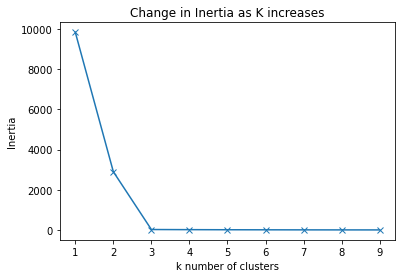

['bedrooms__2_', 'bedrooms__3_', 'rsle']


In [86]:
double_var= ['bedrooms__2_', 'bedrooms__3_', 'rsle']

inertia_series = pd.Series(
            {k: KMeans(k).fit(train[double_var]).inertia_
            for k in range(1,10)})
        
inertia_series.plot(marker='x')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K increases')
plt.show()
print(double_var)

In [ ]:
for i, j in enumerate(X_cols):
    for k in range(i+1, len(X_cols)):
        
        double_var = [j, X_cols[k], 'rsle']
        
        inertia_series = pd.Series(
            {k: KMeans(k).fit(train[double_var]).inertia_
            for k in range(1,10)})
        
        inertia_series.plot(marker='x')
        plt.ylabel('Inertia')
        plt.xlabel('k number of clusters')
        plt.title('Change in Inertia as K increases')
        plt.show()
        print(double_var)

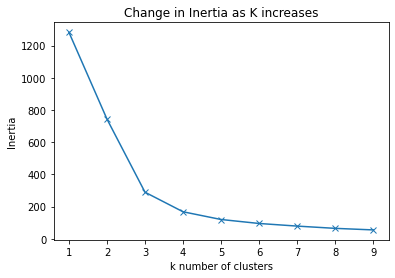

['tot_sqft', 'hot_tub', 'rsle']


What is the Elbow?  3


The elbow is 3


TypeError: '<' not supported between instances of 'int' and 'str'

In [83]:
for i, j in enumerate(X_cols):
    for k in range(i+1, len(X_cols)):
        
        double_var = [j, X_cols[k], 'rsle']

        inertia_series = pd.Series(
            {k: KMeans(k).fit(train[double_var]).inertia_
            for k in range(1,10)})
        
        inertia_series.plot(marker='x')
        plt.ylabel('Inertia')
        plt.xlabel('k number of clusters')
        plt.title('Change in Inertia as K increases')
        plt.show()
        print(double_var)


        # for l in range(1, len(inertia_series)):
            # y = (inertia_series[l])
            # x = (inertia_series[l] - inertia_series[l+1])
            # print(f'For n_clusters = {l}: Inertia is = {round(y,2):>4}: diff = {round(x,2)}')
        elbow = input('What is the Elbow? ')
        # if elbow == 'y':
        print(f'The elbow is {elbow}')
        kmeans = KMeans(elbow).fit(train[double_var])
        print(kmeans)
        train[f'cluster_{j}_{X_cols[k]}'] = kmeans.predict(train[double_var])
        print(train[double_var].columns.to_list())
        print(f'cluster_{j}_{X_cols[k]}')
                
#                 sns.relplot(data=train,
#                             x= j,
#                             k= X_cols[k],
#                             hue= 'species_name',
#                             col= f'cluster_{j}_{X_cols[k]}'
#                            )
                
        

# FINAL CELL
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>